# ozone_cmip6_runs: examine O3 output in runs.

# last edited 12 September 2018

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [11]:
print('BEGIN')

import socket
import re
import os
import inspect
import shutil
import numpy as np
import numpy.ma as ma
import datetime
import netCDF4

__file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())

from decadal_diag import \
  fractional_year_from_num2date, \
  generate_daily_month_indices, \
  get_timestamp_number, \
  fractional_year_from_num2date, \
  shade_2d_simple, \
  basic_stats, \
  shade_2d_latlon

from n_data_funcs import n_data_funcs

%matplotlib inline

CRED = '\033[91m'
CEND = '\033[0m'

hostname=socket.gethostname()

print('hostname=',hostname)

print('END')

BEGIN
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
hostname= oa-32-cdc
END


BEGIN
input file= /OSM/CBR/OA_DCFP/data/CAFEPP/various/MSR-2.nc
(468, 361, 720)
174


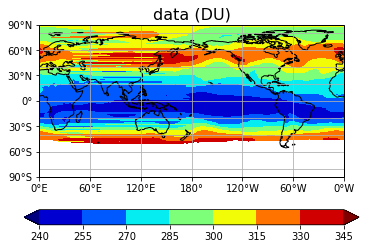

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [301 301 301 ... 301 301 301]
 [301 301 301 ... 301 301 301]
 [301 301 301 ... 301 301 301]]


SystemExit: STOP!:jupyter_notebook line number: 89

/OSM/CBR/OA_DCFP/apps/col414/anaconda3/envs/cafepp_36_new/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [37]:
print('BEGIN')

'''
http://www.temis.nl/protocols/O3global.html

here we can process the nc file even though it has poorly defined time axis.
'''

months=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

#===============================================================================

obs_idir='/OSM/CBR/OA_DCFP/data/CAFEPP/various'
obs_ifil='MSR-2.nc'

print('input file=',obs_idir+'/'+obs_ifil)

obs_ifhN = netCDF4.Dataset(obs_idir+'/'+obs_ifil, 'r')

obs_o3_from_monthly = obs_ifhN.variables['Average_O3_column'][:]
obs_o3_from_monthly = np.roll(obs_o3_from_monthly, 361, axis=-1)

obs_lat = obs_ifhN.variables['latitude'][:]
obs_lon = obs_ifhN.variables['longitude'][:]

# print(type(obs_o3_from_monthly))
print(obs_o3_from_monthly.shape)
#print(obs_o3_from_monthly)

#basic_stats(obs_o3_from_monthly)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

cbeg=1981
cend=2000

#this is the full year range of dataset.
ybeg=1979
yend=2017

obs_time_calendar='julian'
obs_time_units='days since 1979-01-01 00:00'

time_stamp_beg=[]
time_stamp_end=[]
for year in range(ybeg,yend+1):
  for month in range(1,12+1):
    #print('year,month=',year,month)
    time_stamp_beg.append(datetime.datetime(year,month,1,1) + datetime.timedelta(hours=0.0))
    if(month==12):
      time_stamp_end.append(datetime.datetime(year+1,1,1) + datetime.timedelta(hours=0.0))
    else:
      time_stamp_end.append(datetime.datetime(year,month+1,1) + datetime.timedelta(hours=0.0))
    
time_beg = netCDF4.date2num(time_stamp_beg, obs_time_units, obs_time_calendar)
time_end = netCDF4.date2num(time_stamp_end, obs_time_units, obs_time_calendar)
time_avg = (time_beg+time_end)/2.0
date_time_stamps = netCDF4.num2date(time_avg, obs_time_units, obs_time_calendar)
num_time_values = netCDF4.date2num(date_time_stamps, obs_time_units, obs_time_calendar)
year_fraction_anomaly = fractional_year_from_num2date(date_time_stamps, obs_time_calendar)

obs_years_months_from_monthly=[]
for cnt in range(date_time_stamps.size):
  obs_years_months_from_monthly.append(date_time_stamps[cnt].year*100+date_time_stamps[cnt].month)

#print(obs_years_months_from_monthly)

ifnd_time=199307
#ifnd_time=201607

ifnd=obs_years_months_from_monthly.index(ifnd_time)
  
#print(ifnd)

obs_lon = np.add(obs_lon,360)
obs_lon=np.where(obs_lon<360.,obs_lon,obs_lon-360.)
obs_lon=np.roll(obs_lon,361)

# print(obs_lon.shape)
# print(obs_lon)

# print(obs_lat.shape)
# print(obs_lat)

shade_2d_latlon(obs_o3_from_monthly[ifnd,], \
  xyvals=(obs_lon, obs_lat), \
  clevs=None, \
  units='DU', \
  cmap='jet')

#print(obs_o3_from_monthly[ifnd,])

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

dummy_o3 = n_data_funcs(Diag=False, input_files=None, input_var_name=None, \
  dummy_mode=(False, date_time_stamps, num_time_values, obs_time_units, obs_time_calendar))

obs_o3_monthly_climatology_from_monthly, obs_o3_monthly_anomaly_from_monthly=dummy_o3.monthly_clim_anom( \
    Diag=False, input=obs_o3_from_monthly, AnnOut=False, ZeroClim=False, cbeg=cbeg, cend=cend)

print('obs_o3_monthly_climatology_from_monthly.shape=',obs_o3_monthly_climatology_from_monthly.shape)
print('obs_o3_monthly_anomaly_from_monthly.shape=',obs_o3_monthly_anomaly_from_monthly.shape)

obs_o3_hov = np.average(np.squeeze(obs_o3_monthly_climatology_from_monthly),axis=2) # no need to weight lon average.
obs_o3_hov_shape=obs_o3_hov.shape
obs_o3_hov_shape_xtramon=[obs_o3_hov_shape[0]+1,obs_o3_hov_shape[1]]
obs_o3_hov_xtramon=ma.zeros(obs_o3_hov_shape_xtramon,dtype=float)
obs_o3_hov_xtramon[0:obs_o3_hov_shape[0],:]=obs_o3_hov
obs_o3_hov_xtramon[obs_o3_hov_shape[0],:]=obs_o3_hov[0,:]

print('obs_o3_hov_xtramon.shape=',obs_o3_hov_xtramon.shape)

clevs=None
#step=20;clevs=sorted(list(set(np.arange(20, 180+step, step).tolist())))

scale=1.0

shade_2d_simple( \
                obs_o3_hov_xtramon*scale, \
                title='MSR-2 ZON AVG '+str(cbeg)+'-'+str(cend), \
                units='DU (x '+str(1/scale)+')', \
                xyvals=(obs_lat, range(0,13)), \
                add_contours=False, \
                clevs=clevs, \
                extend='both', \
                cmap='jet', \
                reverse_yaxis=True, \
                ylab='Month', \
                xlab='Latitude',
                xlim=[-90,90], \
                grid=True, \
                ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']))

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

step=20;clevs=sorted(list(set(np.arange(-100, 100+step, step).tolist())))

shade_2d_simple( \
               np.transpose(np.average(obs_o3_monthly_anomaly_from_monthly,axis=2))*scale, \
                xyvals=(year_fraction_anomaly, obs_lat), \
                title='MSR-2 ZON AVG MON ANOMS c='+str(cbeg)+'-'+str(cend), \
                units='DU (x '+str(1/scale)+')', \
                clevs=clevs, \
                grid=True, \
                extend='both', \
                cmap='jet', \
                xlab='Year', \
                ylab='Latitude', \
                xtik=range(1978,2019,2), \
                xlim=[1978,2019], \
                n_contour=[0], \
                xysize=(20,8), \
               )

raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

cafe_sep18a_idir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p14f1/Amon/o3col/gn/v20171025'
cafe_sep18a_ifil='o3col_Amon_historical_CAFE-1-0_r1i1p14f1_gn_198001-198812.nc'

print(CRED+'Processing cafe monthly ozone ...'+CEND)

print('cafe O3 sep18a=',cafe_sep18a_idir+'/'+cafe_sep18a_ifil)

cafe_sep18a_monthly_files=n_data_funcs(input_files=[[cafe_sep18a_idir+'/'+cafe_sep18a_ifil]], input_var_name='o3col')

cafe_sep18a_monthly_files.calculate_filedatetime_info(calendar='noleap')

cafe_sep18a_monthly_files.get_latlon_info(Diag=False)

cafe_sep18a_monthly_o3_from_monthly = cafe_sep18a_monthly_files.calculate_quantity('dummy', quantity='latlon_region')

cafe_sep18a_o3_monthlyclimatology_from_monthly, cafe_sep18a_o3_monthlyanomaly_from_monthly = cafe_sep18a_monthly_files.monthly_clim_anom( \
  Diag=False, input=cafe_sep18a_monthly_o3_from_monthly, AnnOut=False, ZeroClim=True) #, cbeg=1981, cend=2000)
  
print('cafe_sep18a_o3_monthlyanomaly_from_monthly.shape=',cafe_sep18a_o3_monthlyanomaly_from_monthly.shape)
print('cafe_sep18a_o3_monthlyclimatology_from_monthly.shape=',cafe_sep18a_o3_monthlyclimatology_from_monthly.shape)

cafe_sep18a_o3_hov = np.average(np.squeeze(cafe_sep18a_o3_monthlyclimatology_from_monthly),axis=2) # no need to weight lon average.
cafe_sep18a_o3_hov_shape=cafe_sep18a_o3_hov.shape
cafe_sep18a_o3_hov_shape_xtramon=[cafe_sep18a_o3_hov_shape[0]+1,cafe_sep18a_o3_hov_shape[1]]
cafe_sep18a_o3_hov_xtramon=ma.zeros(cafe_sep18a_o3_hov_shape_xtramon,dtype=float)
cafe_sep18a_o3_hov_xtramon[0:cafe_sep18a_o3_hov_shape[0],:]=cafe_sep18a_o3_hov
cafe_sep18a_o3_hov_xtramon[cafe_sep18a_o3_hov_shape[0],:]=cafe_sep18a_o3_hov[0,:]

print('cafe_sep18a_o3_hov_xtramon.shape=',cafe_sep18a_o3_hov_xtramon.shape)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

clevs=None
#step=20;clevs=sorted(list(set(np.arange(20, 180+step, step).tolist())))

scale=1.0

shade_2d_simple( \
                cafe_sep18a_o3_hov_xtramon*scale, \
                title='CAFE sep18a ZON AVG 1980-1988',\
                units='DU (x '+str(1/scale)+')', \
                xyvals=(cafe_sep18a_monthly_files.lat, range(0,13)), \
                add_contours=False, \
                clevs=clevs, \
                extend='both', \
                cmap='jet', \
                reverse_yaxis=True, \
                ylab='Month', \
                xlab='Latitude',
                xlim=[-90,90], \
                grid=True, \
                ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']))

# (108, 90, 144)

shade_2d_simple( \
               np.transpose(np.average(cafe_sep18a_o3_monthlyanomaly_from_monthly,axis=2))*scale, \
                xyvals=(cafe_sep18a_monthly_files.year_fraction_anomaly, cafe_sep18a_monthly_files.lat), \
                title='CAFE sep18a ZON AVG MON ANOMS 1980-1988',\
                units='DU (x '+str(1/scale)+')', \
                clevs=clevs, \
                grid=True, \
                extend='both', \
                cmap='jet', \
                xlab='Year', \
                ylab='Latitude', \
                xtik=range(1980,1989), \
                n_contour=[0] \
               )

raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

cafe_sep18b_idir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r1i1p15f1/Amon/o3col/gn/v20171025'
cafe_sep18b_ifil='o3col_Amon_historical_CAFE-1-0_r1i1p15f1_gn_198001-198812.nc'

print(CRED+'Processing cafe monthly ozone ...'+CEND)

print('cafe O3 sep18b=',cafe_sep18b_idir+'/'+cafe_sep18b_ifil)

cafe_sep18b_monthly_files=n_data_funcs(input_files=[[cafe_sep18b_idir+'/'+cafe_sep18b_ifil]], input_var_name='o3col')

cafe_sep18b_monthly_files.calculate_filedatetime_info(calendar='noleap')

cafe_sep18b_monthly_files.get_latlon_info(Diag=False)

cafe_sep18b_monthly_o3_from_monthly = cafe_sep18b_monthly_files.calculate_quantity('dummy', quantity='latlon_region')

cafe_sep18b_o3_monthlyclimatology_from_monthly, cafe_sep18b_o3_monthlyanomaly_from_monthly = cafe_sep18b_monthly_files.monthly_clim_anom( \
  Diag=False, input=cafe_sep18b_monthly_o3_from_monthly, AnnOut=False, ZeroClim=False, cbeg=1981, cend=2000)
  
print('cafe_sep18b_o3_monthlyanomaly_from_monthly.shape=',cafe_sep18b_o3_monthlyanomaly_from_monthly.shape)
print('cafe_sep18b_o3_monthlyclimatology_from_monthly.shape=',cafe_sep18b_o3_monthlyclimatology_from_monthly.shape)

cafe_sep18b_o3_hov = np.average(np.squeeze(cafe_sep18b_o3_monthlyclimatology_from_monthly),axis=2) # no need to weight lon average.
cafe_sep18b_o3_hov_shape=cafe_sep18b_o3_hov.shape
cafe_sep18b_o3_hov_shape_xtramon=[cafe_sep18b_o3_hov_shape[0]+1,cafe_sep18b_o3_hov_shape[1]]
cafe_sep18b_o3_hov_xtramon=ma.zeros(cafe_sep18b_o3_hov_shape_xtramon,dtype=float)
cafe_sep18b_o3_hov_xtramon[0:cafe_sep18b_o3_hov_shape[0],:]=cafe_sep18b_o3_hov
cafe_sep18b_o3_hov_xtramon[cafe_sep18b_o3_hov_shape[0],:]=cafe_sep18b_o3_hov[0,:]

print('cafe_sep18b_o3_hov_xtramon.shape=',cafe_sep18b_o3_hov_xtramon.shape)

#raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

clevs=None
#step=20;clevs=sorted(list(set(np.arange(20, 180+step, step).tolist())))

scale=1.0

shade_2d_simple( \
                cafe_sep18b_o3_hov_xtramon*scale, \
                title='CAFE sep18b ZON AVG 1980-1988',\
                units='DU (x '+str(1/scale)+')', \
                xyvals=(cafe_sep18b_monthly_files.lat, range(0,13)), \
                add_contours=False, \
                clevs=clevs, \
                extend='both', \
                cmap='jet', \
                reverse_yaxis=True, \
                ylab='Month', \
                xlab='Latitude',
                xlim=[-90,90], \
                grid=True, \
                ytik=(range(0,13),['J','F','M','A','M','J','J','A','S','O','N','D','J']))

#===============================================================================

print('END')

In [4]:
1745535*100/121642560

1.4349706221243617